#Mini Project 4
##By Megan Gross, 24650006
The problem to be solved in this project is to design an intelligent agent to make decisions navigating through a grid using reinforcement learning. 

This problem was solved with Q-learning which is an active reinforcement learning model in which the agent has no fixed policy and must decide independently which actions to take. 

In [64]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [65]:
cd /content/gdrive/MyDrive/Colab Notebooks/36_24650006_miniP4_AT2_notebook

/content/gdrive/MyDrive/Colab Notebooks/36_24650006_miniP4_AT2_notebook


Import the files needed. The heading.py file contains the code for creating the Q-learning agent class. The MDP file contains the code for creating the environment.

In [66]:
from heading import *
from mdp import *

The rewards are **+1** and **-1** in the terminal states, and **-0.05** or `s` in the rest. 


In [67]:
s = -0.05

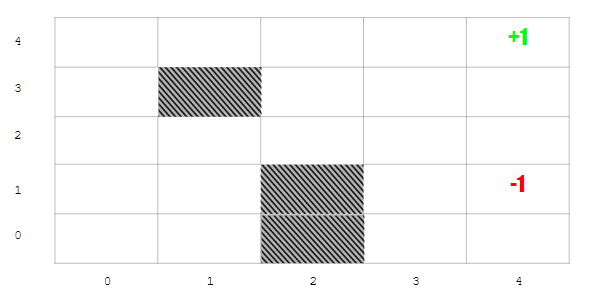

Use `s` define the map according to the image above, and for the crossed out squares, use `None`. 

In [68]:
map = [
        [s, s,    s, None, 1],
        [s, None, s, s,    s],
        [s, s,    s, s,    s],
        [s, s, None, s,   -1],
        [s, s, None, s,    s]
      ]

Then, we need to define the locations of two terminals. The terminals are defined at (4,4) and (4,1), as seen above.

In [69]:
terminals = [(4, 4), (4, 1)]

Gamma, which is the discount factor, was set at 0.95. This value determines the importance of future rewards. It ranges from 0 to 1 with a value close zero telling the agent to consider current rewards and a value close to one telling the agent to consider long-term future rewards. The probability of the agent moving up was 0.65, moving left was 0.20 and moving right was 0.15. 

In [70]:
gamma = .95 
up = 0.65
left = 0.2
right = 0.15

Use  the GridMDP, created with `GridMDP(map, terminals, gamma, up, left, right)` to create the decision environment using the Markov Decision Process (MDP). 

In [71]:
decisionEnvironment = GridMDP(map, terminals, gamma, up, left, right)

Define the actions that the agent can take in each state. We define the four actions as:  
*   north=(0,1)
*   east=(1,0)
*   south=(0,-1)
*   west=(-1,0)


In [72]:
north=(0, 1)
east= (1, 0)
south=(0,-1)
west=(-1,0)

A policy is defined purely for comparative purposes as this model does not utilize a policy. The policy defined can be seen in accordance with the image below. The policy was defined using a dictionary where the dictionary key was the state (x, y coordinate) and the value is the action of which direction to move.

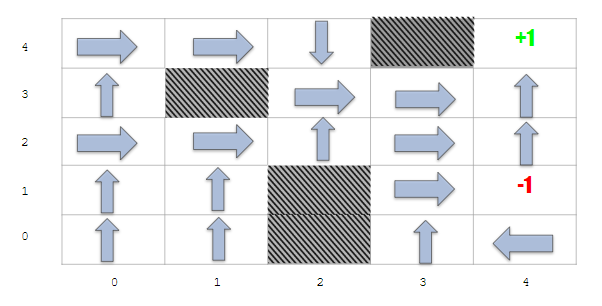



In [73]:
policy = {
    (0, 4): east,  (1, 4): east,  (2, 4): south,                 (4, 4): None, 
    (0, 3): north,                (2, 3): east,  (3, 3): east,  (4, 3): north,
    (0, 2): east,  (1, 2): east,  (2, 2): north, (3, 2): east,  (4, 2): north,
    (0, 1): north, (1, 1): north,                (3, 1): north, (4, 1): None,
    (0, 0): north, (1, 0): north,                (3, 0): north, (4, 0): west,
}

The Q-agent is created with the QLearningAgent class defined in the heading.py file. This object is defined using four things: the stochastic learning environment, the iteration limit in the exploration function (`Ne`), the value to assign before iteration (`Rplus`), and the learning rate (`alpha`). The Ne is set to 5, which means the exploration agent will visit the state, action five times. The Rplus is the optimistic initial condition which encourages exploration and is set at 2. Because the reward is 1 and is the highest value possible, no matter the action selected the value will always be less than the Rplus of 2 which increases choice probability. The learning rate determines the rate at which new information overrides the old existing information. 

In [74]:
qAgent = QLearningAgent(decisionEnvironment, Ne=5, Rplus=2, alpha=lambda n: 60./(59+n))

3,000 single trials were run for the Q-agent in the decision environment.

In [75]:
for i in range(3000):
    run_single_trial(qAgent,decisionEnvironment)

The Q Values are printed with the keys being state-action pairs. As said above the actions correlate to:
*   north = (0, 1)
*   east = (1, 0)
*   south = (0,-1)
*   west = (-1, 0)

In [ ]:
qAgent.Q

Use `convert_value_estimate()` method to convert the Q Values above into U estimates. The estimated U cost at each state are then printed. U estimates are the expected total discounted reward if the agent were to take the action associated with U value.

In [77]:
U = convert_value_estimate(qAgent.Q)
print('\n'.join([str(k)+' : '+str(v) for k, v in U.items()]))

(0, 0) : -0.050830998619934474
(1, 0) : -0.006276600135404441
(1, 1) : 0.08215923201590762
(1, 2) : 0.19927631857405934
(2, 2) : 0.31988069978600364
(2, 3) : 0.42284162173541506
(3, 3) : 0.6175301898707224
(3, 2) : 0.45959227656652496
(4, 2) : 0.6213752983595958
(4, 3) : 0.793541109406772
(4, 4) : 1
(2, 4) : 0.2850913695250558
(0, 1) : 0.01889126542281784
(1, 4) : 0.207157689494089
(0, 4) : -0.25384876854331584
(0, 2) : 0.08401859686371518
(0, 3) : 0.011378269258642344
(3, 1) : -0.01597275232112262
(4, 1) : -1
(3, 0) : -0.01796924261132194
(4, 0) : 0.0


Use value iteration and policy iteration to compare the results. The policy iteration is used to compare with the policy I made, and the value iteration is used to compare with the Q-agent.

In [ ]:
uValues_valueIteration = value_iteration(decisionEnvironment)

In [79]:
uValues_policyIteration = policy_iteration(decisionEnvironment)

Streaming output truncated to the last 5000 lines.
(4, 2) -0.8328703700201235
(1, 0) -0.5430463778313233
(0, 1) -0.5696649764333209
(3, 1) -0.05
(4, 3) 0.6505292764546784
(2, 4) -0.5445445455049245
interation number is 13/40
(3, 0) -0.9034832241796704
(0, 2) -0.5888589213823449
(0, 3) -0.5819133306126991
(4, 0) -0.9785518275954823
(1, 2) -0.5954079239650603
(3, 3) -0.4082555024394511
(4, 4) 0.0
(2, 2) -0.5936292711780911
(0, 4) -0.5679932188907231
(4, 1) 0.0
(1, 1) -0.5696292223778003
(3, 2) -0.05
(0, 0) -0.571135179254848
(1, 4) -0.5651766571956196
(2, 3) -0.49015340754517467
(4, 2) -0.8328703703038235
(1, 0) -0.5698967131426094
(0, 1) -0.5950160029247531
(3, 1) -0.05
(4, 3) 0.6476318764312959
(2, 4) -0.5712374194509103
interation number is 14/40
(3, 0) -0.9225720976196912
(0, 2) -0.6130177062816149
(0, 3) -0.6067438795387766
(4, 0) -0.9836993889725665
(1, 2) -0.6187299283848096
(3, 3) -0.4203461382567672
(4, 4) 0.0
(2, 2) -0.6147021528766446
(0, 4) -0.5933763002418082
(4, 1) 0.0
(1, 

The policy grid for the computer policy iteration and the original defined policy are printed for comparision. This purely for amusement to see how the policy iteration created compared to the one I hand made.

In [80]:
decisionEnvironment.to_arrows(uValues_policyIteration)

[['>', '>', 'v', None, '.'],
 ['^', None, '>', '>', '^'],
 ['>', '>', '^', '^', '^'],
 ['^', '^', None, '<', '.'],
 ['^', '^', None, '^', '<']]

In [81]:
decisionEnvironment.to_arrows(policy)

[['>', '>', 'v', None, '.'],
 ['^', None, '>', '>', '^'],
 ['>', '>', '^', '>', '^'],
 ['^', '^', None, '^', '.'],
 ['^', '^', None, '^', '<']]

The state values are sorted nurmerically. The U values for both Q-learning and value iteration are printed so that they can be compared.

In [82]:
state = sorted(uValues_valueIteration.keys())
print ("State, Q-learning agent U value, Value iteration U value:\n")
for x in state:
    print("{},\t{},\t{}".format(x,U[x],uValues_valueIteration[x]))

State, Q-learning agent U value, Value iteration U value:

(0, 0),	-0.050830998619934474,	0.5724755252071029
(0, 1),	0.01889126542281784,	0.6814265897624134
(0, 2),	0.08401859686371518,	0.786544156123725
(0, 3),	0.011378269258642344,	0.6527206238298128
(0, 4),	-0.25384876854331584,	0.7567859097237247
(1, 0),	-0.006276600135404441,	0.6521000437857062
(1, 1),	0.08215923201590762,	0.8103731785536737
(1, 2),	0.19927631857405934,	0.9966379733682862
(1, 4),	0.207157689494089,	0.9230508469319334
(2, 2),	0.31988069978600364,	1.2012932477480378
(2, 3),	0.42284162173541506,	1.28301807589754
(2, 4),	0.2850913695250558,	1.0787634661167054
(3, 0),	-0.01796924261132194,	0.41898160863814804
(3, 1),	-0.01597275232112262,	0.6189327475597652
(3, 2),	0.45959227656652496,	1.354389515017668
(3, 3),	0.6175301898707224,	1.5495849870951754
(4, 0),	0.0,	0.050414957043823816
(4, 1),	-1,	-1
(4, 2),	0.6213752983595958,	1.538772409924701
(4, 3),	0.793541109406772,	1.8010742245458697
(4, 4),	1,	1


Uninmportant self-note: 

*   use \* \* to *italicize*
*   use \** \** to **bold**
*   use \` \` to `highlight`
*   use \# for headings







